In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

# Load dataset
file_path = '/content/exams.csv'  # Update with your dataset path
df = pd.read_csv(file_path, sep=',')

# Display first few rows
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert categorical variables to numerical
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Define features and target variable
target_column = 'math score'  # Update target column based on dataset
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Skewness and Kurtosis
print("Skewness before outlier removal:\n", df[numerical_cols].skew())
print("Kurtosis before outlier removal:\n", df[numerical_cols].kurt())



Skewness before outlier removal:
 gender                        -0.032052
race/ethnicity                -0.113370
parental level of education   -0.075586
lunch                         -0.676536
test preparation course       -0.657772
reading score                 -0.183505
writing score                 -0.214574
dtype: float64
Kurtosis before outlier removal:
 gender                        -2.002983
race/ethnicity                -0.742819
parental level of education   -1.371469
lunch                         -1.545394
test preparation course       -1.570480
reading score                 -0.263506
writing score                 -0.179746
dtype: float64


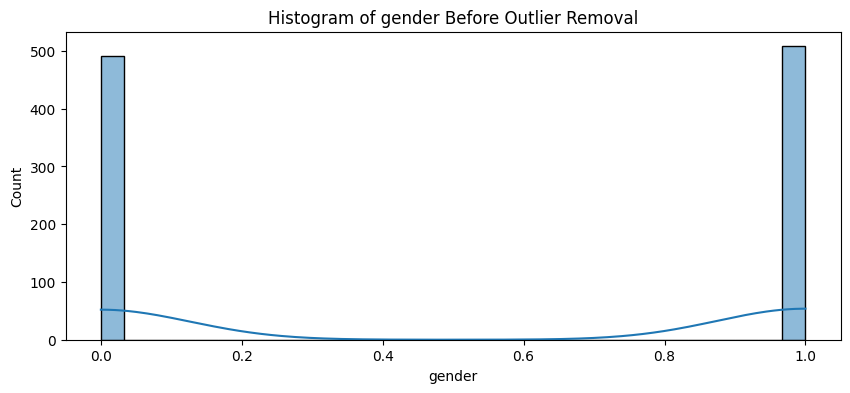

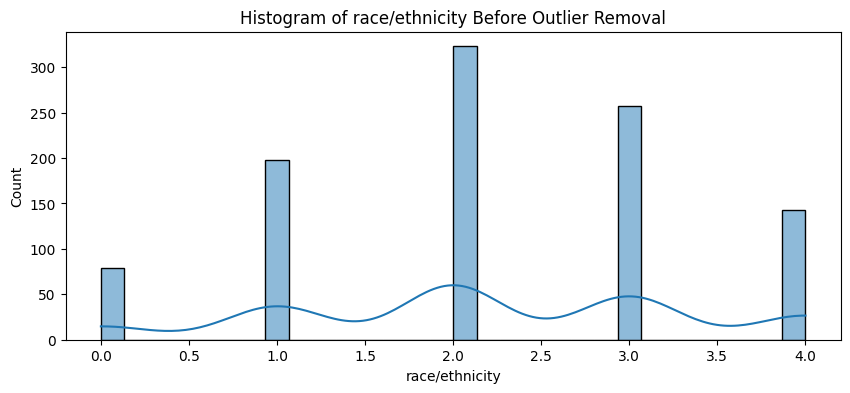

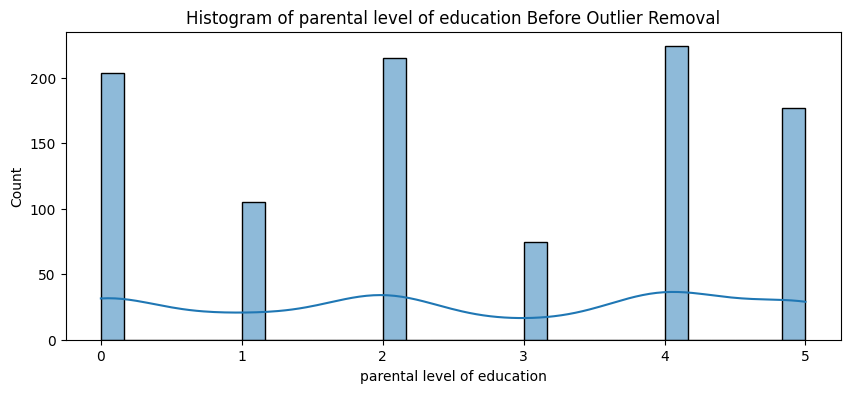

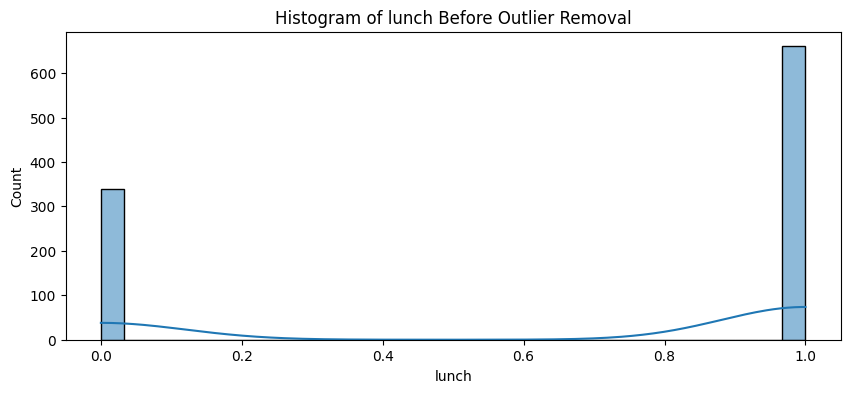

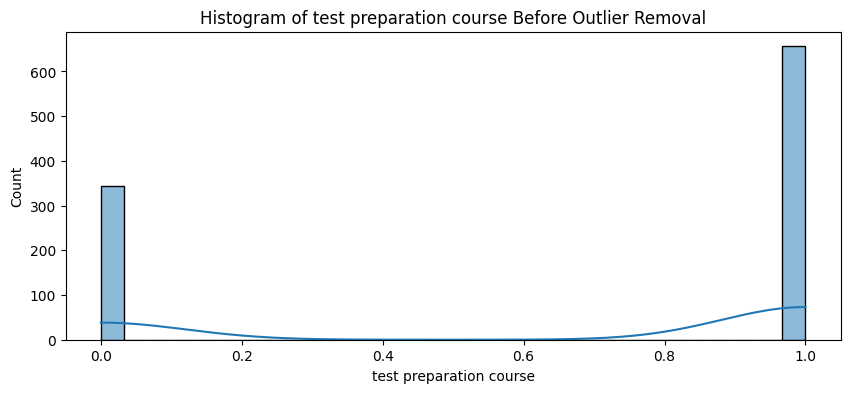

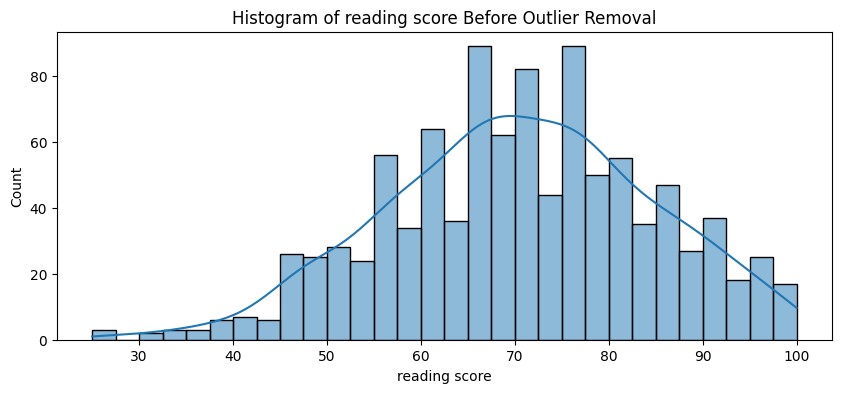

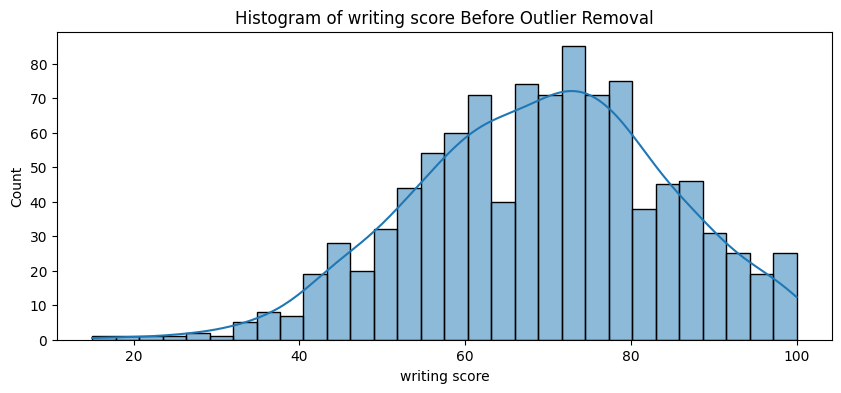

In [ ]:
# Histograms before outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} Before Outlier Removal')
    plt.show()

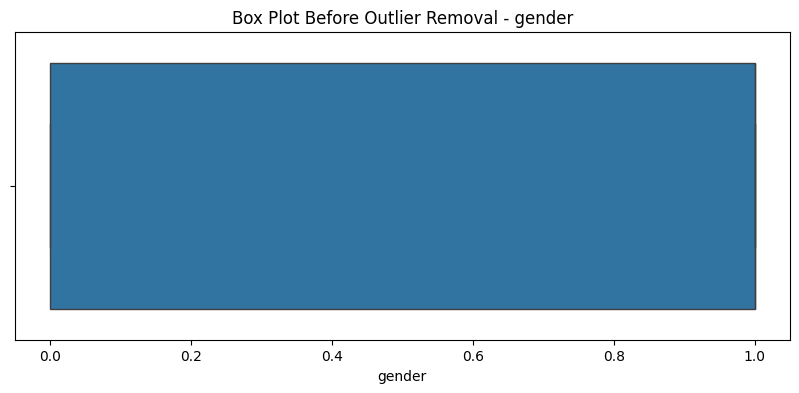

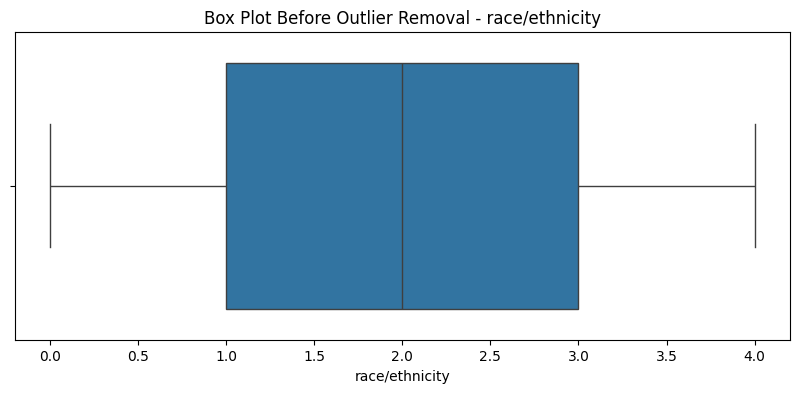

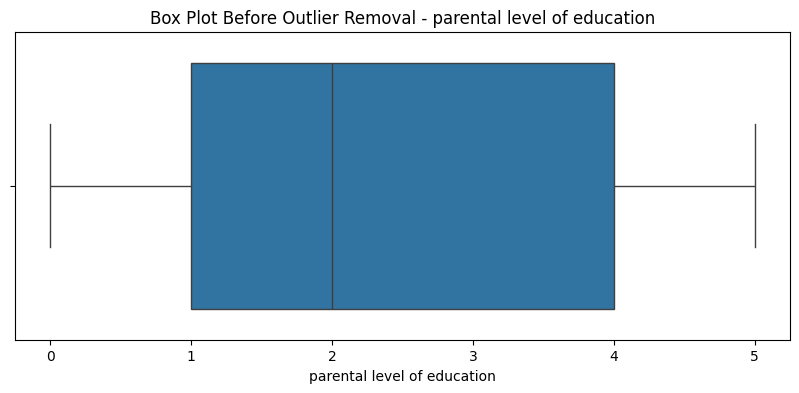

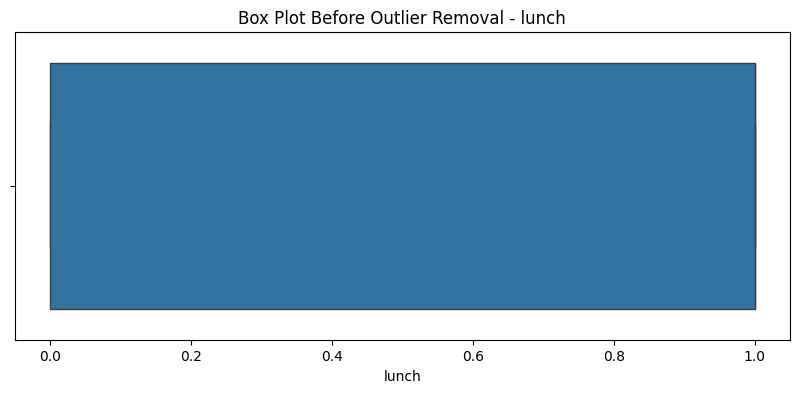

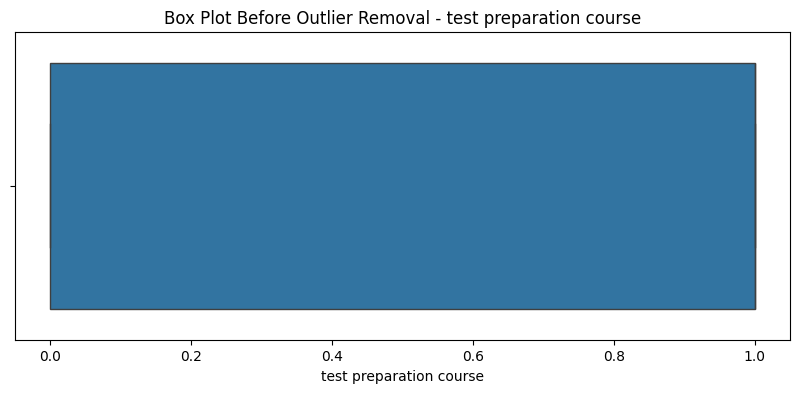

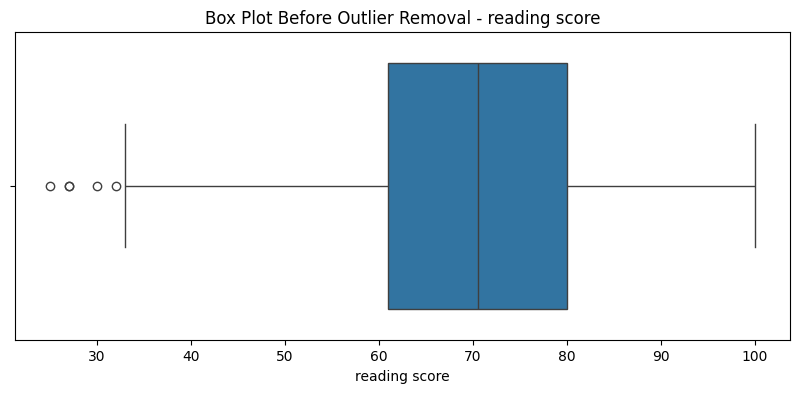

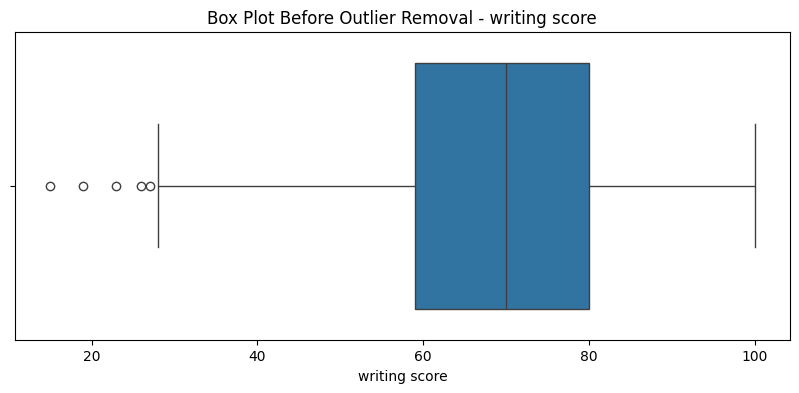

In [ ]:
# Boxplots before outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot Before Outlier Removal - {col}")
    plt.show()

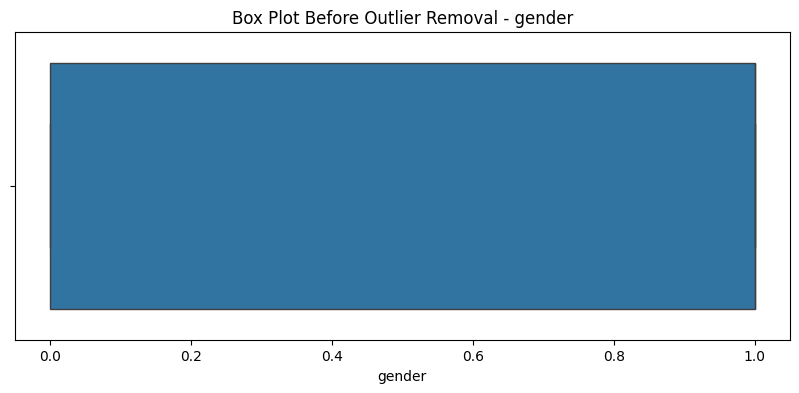

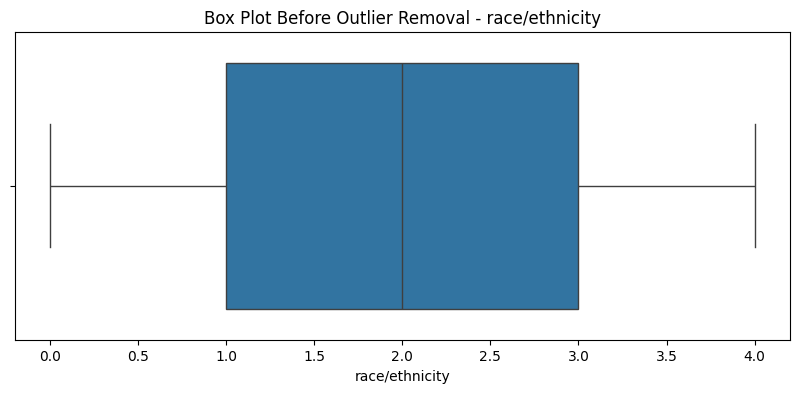

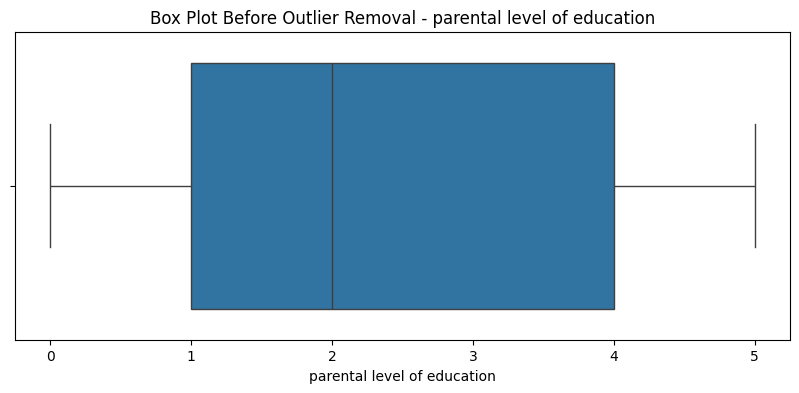

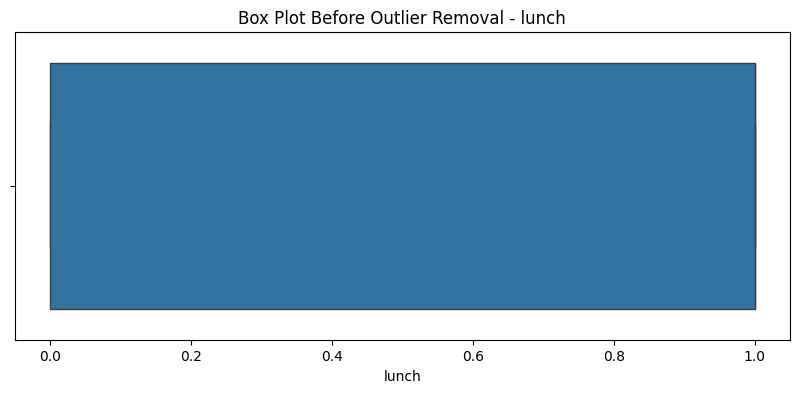

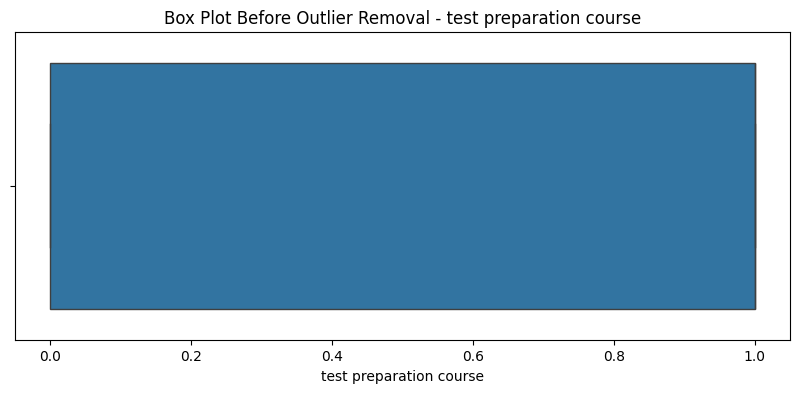

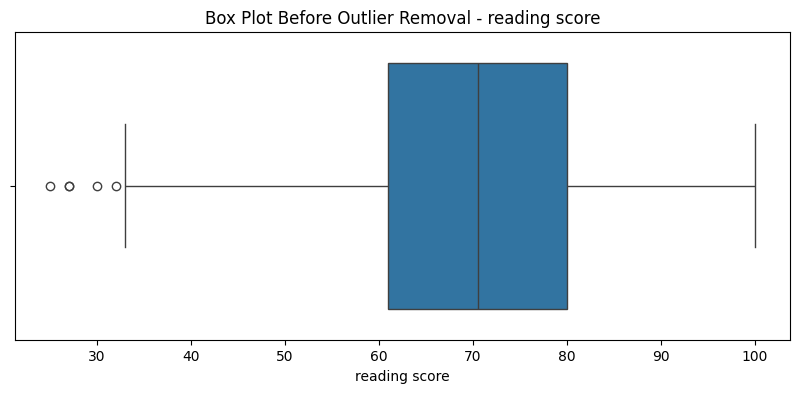

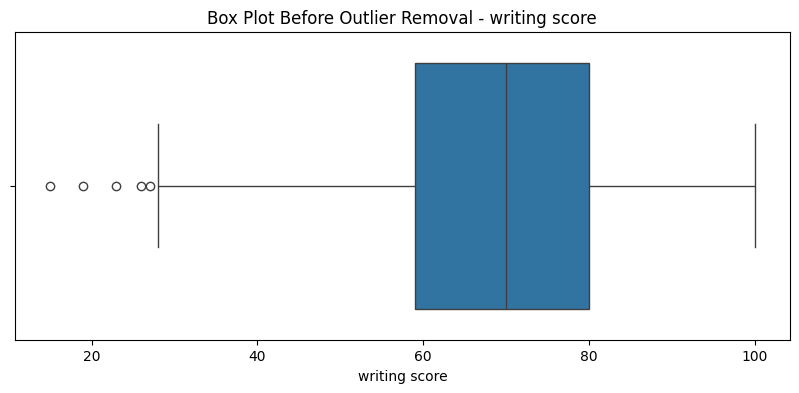

In [ ]:
# Boxplots before outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot Before Outlier Removal - {col}")
    plt.show()


In [ ]:

# Outlier removal using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[outlier_condition]


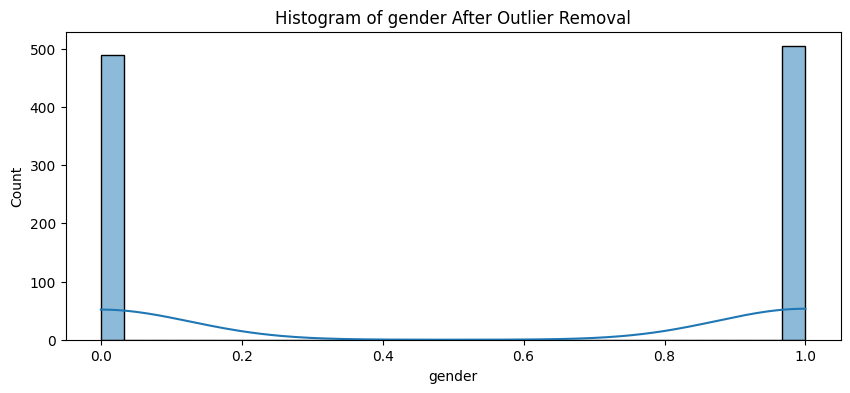

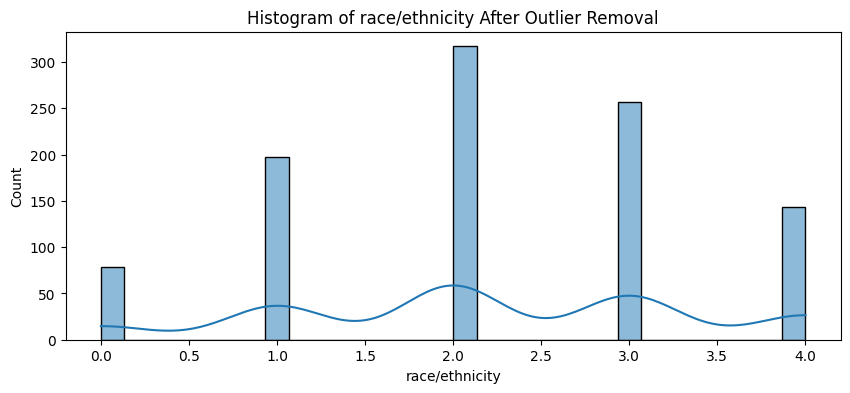

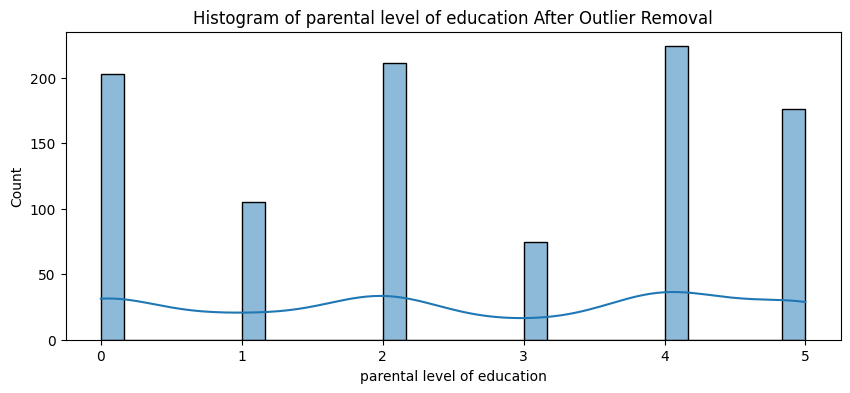

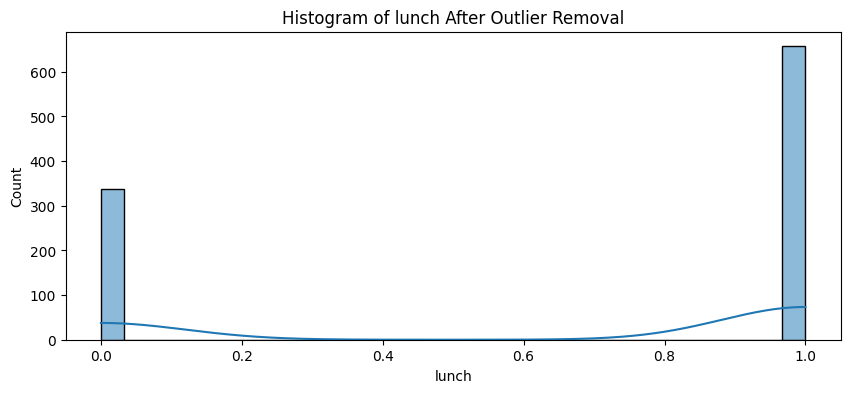

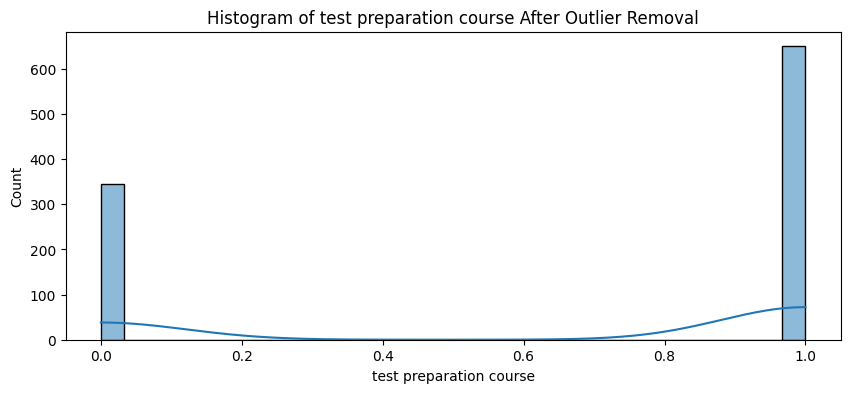

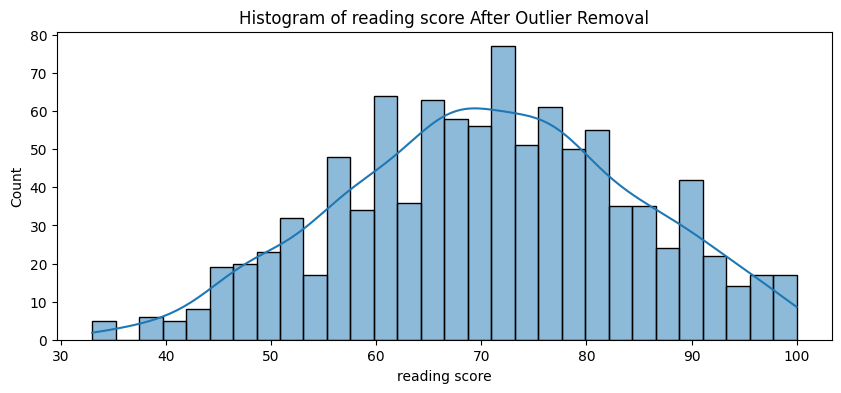

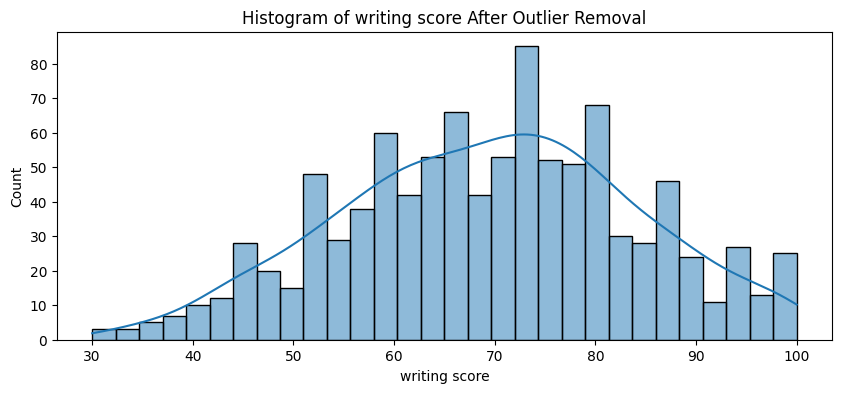

In [ ]:
# Histograms after outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} After Outlier Removal')
    plt.show()

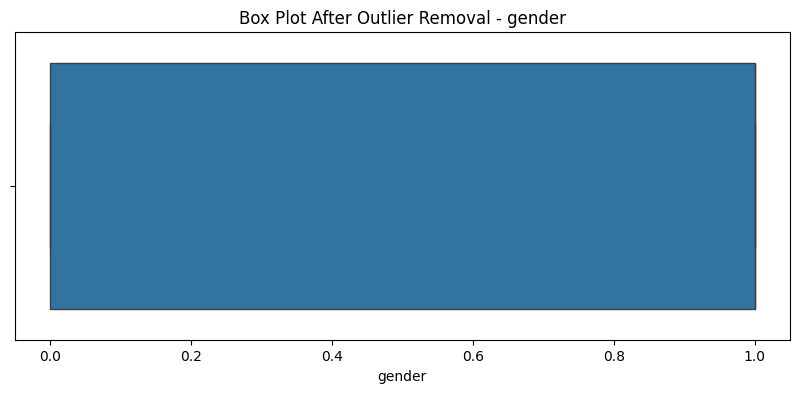

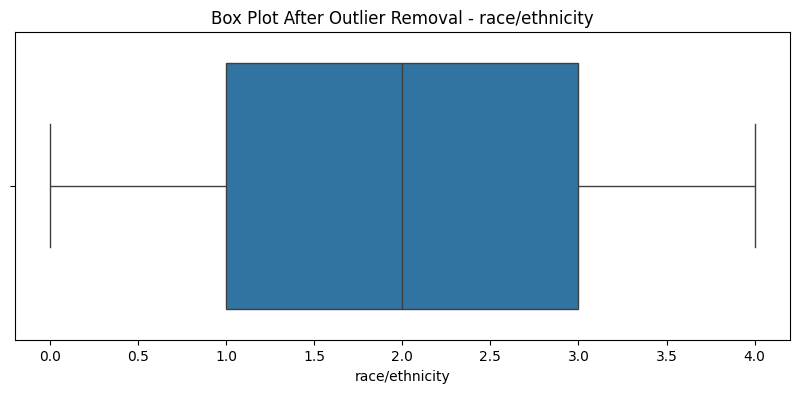

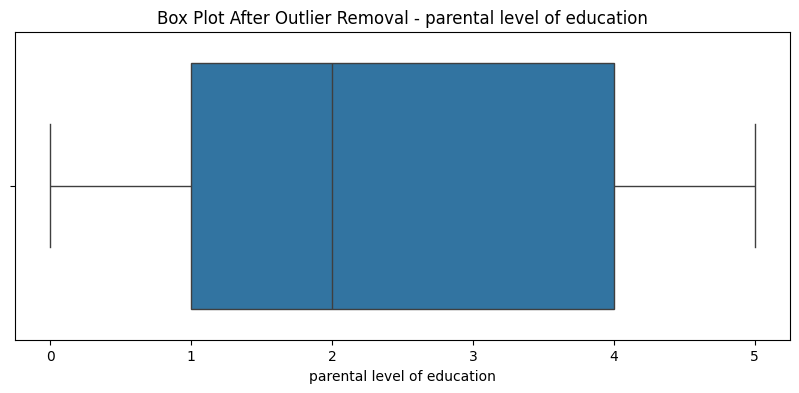

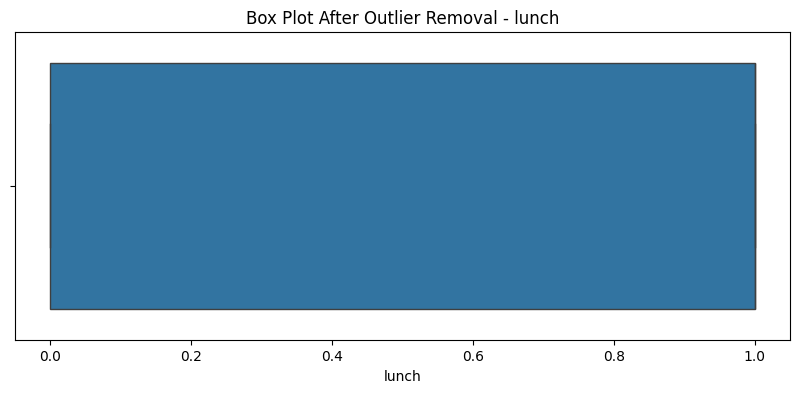

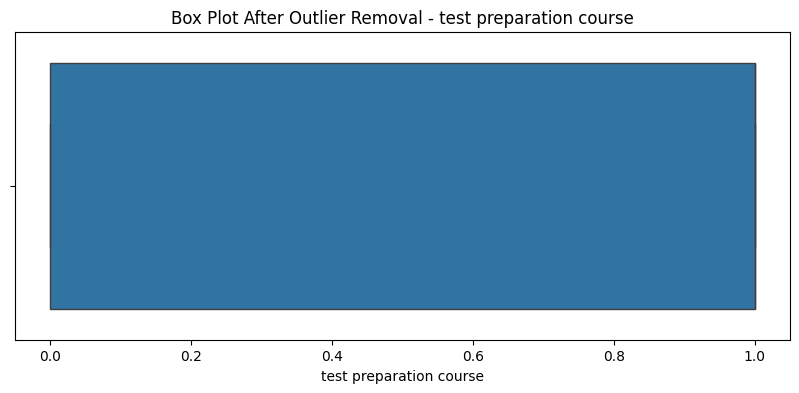

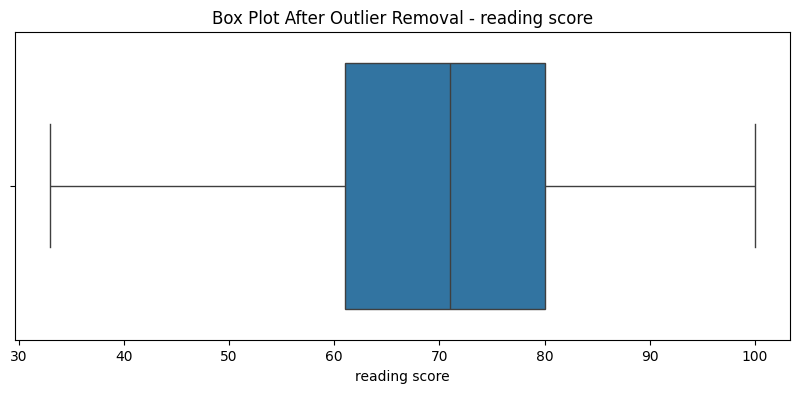

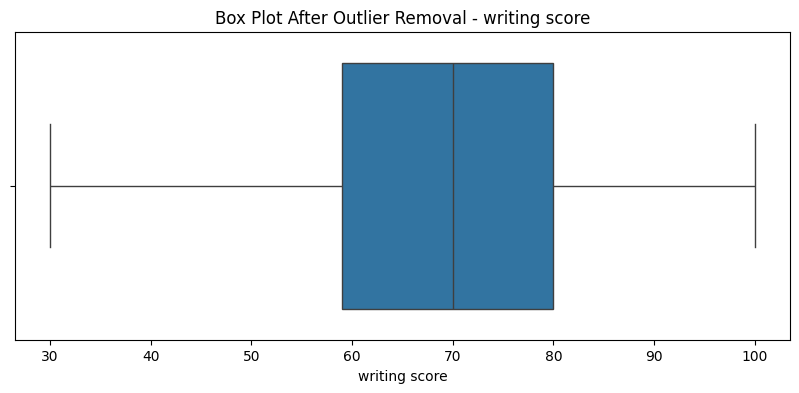

In [ ]:
# Boxplots after outlier removal
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Box Plot After Outlier Removal - {col}")
    plt.show()

In [ ]:

# Skewness and Kurtosis after outlier removal
print("Skewness after outlier removal:\n", df_cleaned[numerical_cols].skew())
print("Kurtosis after outlier removal:\n", df_cleaned[numerical_cols].kurt())

# Update features and target after outlier removal
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Skewness after outlier removal:
 gender                        -0.028214
race/ethnicity                -0.115988
parental level of education   -0.079260
lunch                         -0.681096
test preparation course       -0.648099
reading score                 -0.091080
writing score                 -0.095260
dtype: float64
Kurtosis after outlier removal:
 gender                        -2.003239
race/ethnicity                -0.755227
parental level of education   -1.374638
lunch                         -1.539209
test preparation course       -1.583157
reading score                 -0.463348
writing score                 -0.477142
dtype: float64


In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

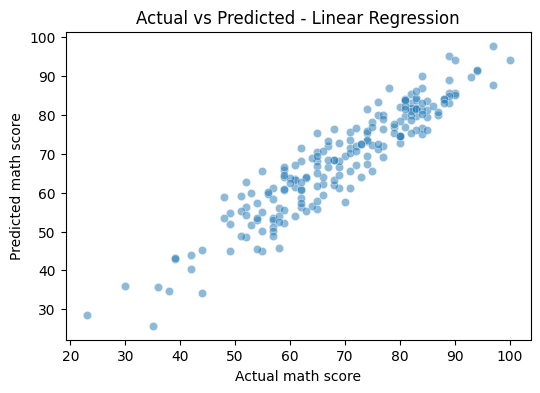

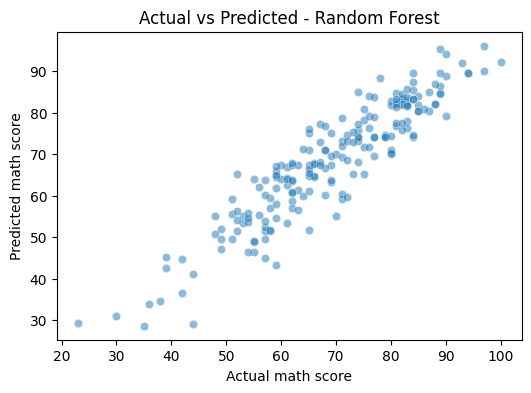

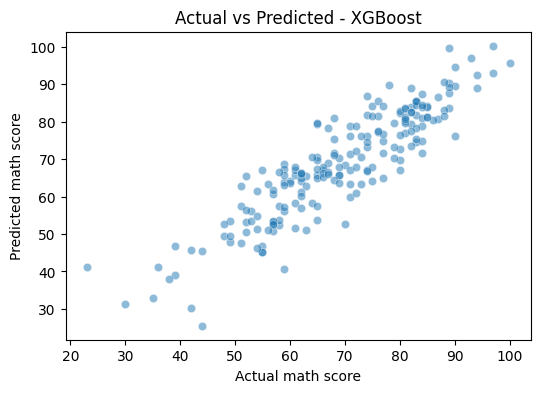

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'Actual vs Predicted - {name}')
    plt.show()

In [ ]:

# Compare results
results_df = pd.DataFrame(results).T
print("Model Performance After Outlier Removal:")
print(results_df)

Model Performance After Outlier Removal:
                        MAE        MSE      RMSE  R2 Score
Linear Regression  4.156556  25.312061  5.031109  0.873210
Random Forest      4.363337  30.424632  5.515853  0.847601
XGBoost            4.993756  41.466553  6.439453  0.792291
